<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
missing_values = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print(missing_values)

Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64


In [5]:
#df['RemoteWork'] = df['RemoteWork'].fillna(df['RemoteWork'].mode()[0])
#df['JobSat']= df['JobSat'].fillna(df['JobSat'].mean())
# too many missing values, considering fill these columns with most frequent or mean. 
# if only analyze the relationship between several columns, it is better to drop missing value
# create new data frame df_1 with dopping missing data from JobSat
df_1 = df.dropna(subset='JobSat')
df_1['JobSat'].value_counts()

JobSat
8.0     7509
7.0     6379
6.0     3751
9.0     3626
10.0    2251
5.0     1956
3.0     1165
4.0     1130
2.0      772
0.0      311
1.0      276
Name: count, dtype: int64

In [6]:
df_1['JobSat'].isnull().sum()


np.int64(0)

In [7]:
## Write your code here
# df['Employment'].isnull().sum() # missing value is 0
# df['JobSat'].isnull().sum() # missing value is 36311
# df['RemoteWork'].isnull().sum() #missing value is 10631
# df['JobSat'].value_counts()
# df['Employment'].value_counts()
# df['RemoteWork'].value_counts()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [8]:
# use only df_1 to solve this task because it contain only 2 columns Jobsat and YearsCodePro
def clean_year(value):
    if value == 'Less than 1 year':
        return 0.5
    elif value == 'More than 50 years':
        return 51
    try:
        return float(value)
    except:
        return np.nan
df_1.loc[:,'YearsCodePro_clean'] = df_1['YearsCodePro'].apply(clean_year)
# Define the bins and labels
bins = [0, 5, 10, 20, float('inf')]  # float('inf') is used for >20
labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years']

# Create a new column for experience ranges
df_1['ExperienceRange'] = pd.cut(df_1['YearsCodePro_clean'], bins=bins, labels=labels, right=False)

# Display the first few rows to check the new column
print(df_1[['YearsCodePro', 'ExperienceRange']].head())

        YearsCodePro ExperienceRange
10               NaN             NaN
12                12     10-20 years
15                27       >20 years
18                10     10-20 years
20  Less than 1 year       0-5 years


/tmp/ipykernel_2832/715647489.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.loc[:,'YearsCodePro_clean'] = df_1['YearsCodePro'].apply(clean_year)
/tmp/ipykernel_2832/715647489.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['ExperienceRange'] = pd.cut(df_1['YearsCodePro_clean'], bins=bins, labels=labels, right=False)


In [9]:
df_1['YearsCodePro'].isnull().sum()


np.int64(770)

In [10]:
df_1['ExperienceRange'].isnull().sum()


np.int64(770)

In [11]:
# considering fill missing data with most frequent value because there is only 770 missing
df_1.loc[:,'ExperienceRange'] = df_1['ExperienceRange'].fillna(df_1['ExperienceRange'].mode()[0])
df_1['ExperienceRange'].isnull().sum()

np.int64(0)

In [12]:
median_js = df_1.groupby('ExperienceRange')['JobSat'].median().reset_index()
median_js


/tmp/ipykernel_2832/323686153.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_js = df_1.groupby('ExperienceRange')['JobSat'].median().reset_index()


,ExperienceRange,JobSat
0,0-5 years,7.0
1,5-10 years,7.0
2,10-20 years,7.0
3,>20 years,8.0


/tmp/ipykernel_2832/3526582906.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ExperienceRange', y='JobSat', data=median_js, palette='viridis')


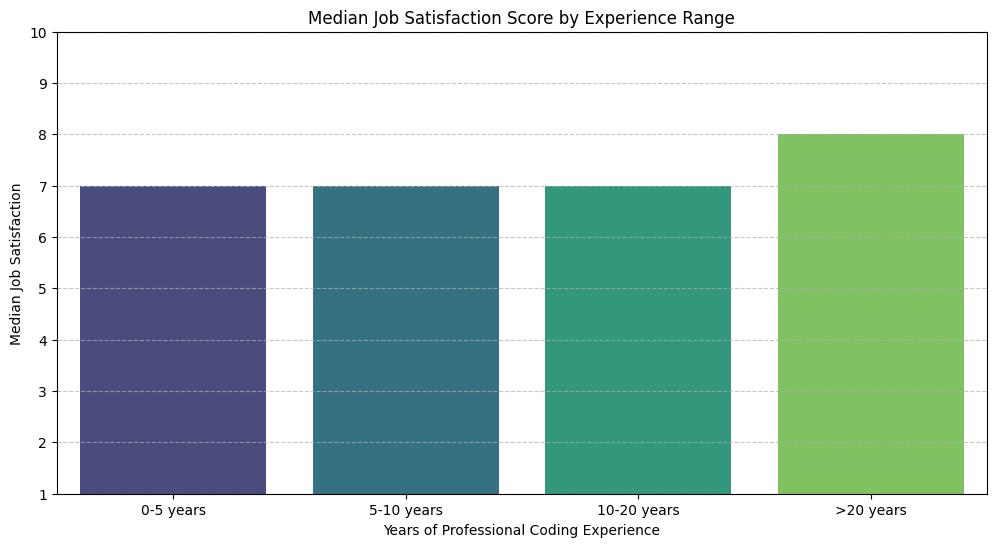

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x='ExperienceRange', y='JobSat', data=median_js, palette='viridis')
plt.title("Median Job Satisfaction Score by Experience Range")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Median Job Satisfaction")
plt.ylim(1, 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


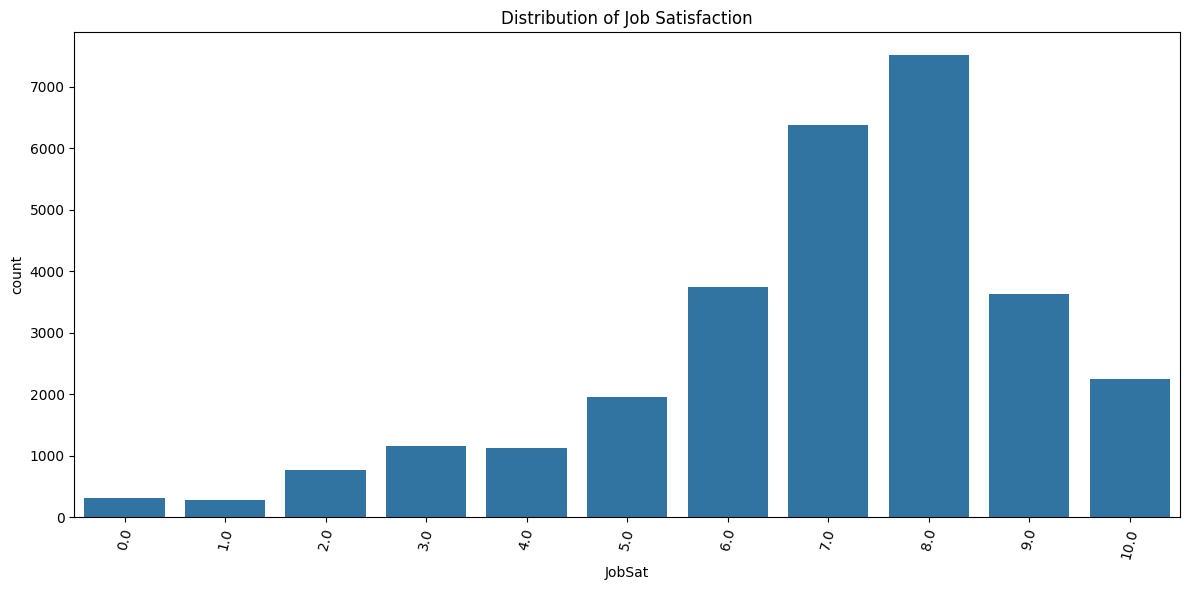

In [14]:
## Write your code here
plt.figure(figsize = (12, 6))
sns.countplot(data = df_1, x = 'JobSat')
plt.title('Distribution of Job Satisfaction')
plt.xticks(rotation = 75)
plt.tight_layout()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


In [25]:
df['Employment'].value_counts() # overview of data entries, there are many conflict: employed and retired in the same entry; 
# student and retired in the same entry

Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking for work;Independent contra

In [26]:
# RemoteWork has 10631 missing value, fill the missing value with most frequent
# create new dataframe df_2 to not affect the original df
df_2 = df
df_2['RemoteWork'] = df_2['RemoteWork'].fillna(df['RemoteWork'].mode()[0])
df_2['RemoteWork'].value_counts()

RemoteWork
Hybrid (some remote, some in-person)    33646
Remote                                  20831
In-person                               10960
Name: count, dtype: int64

In [27]:
# It is necessary to build conflict groups to eliminate data that contains conflicting information.
# Step 1: Create conflict groups; if there are 2 or more values within the same set {}, it means it is a conflict group - invalid data.
conflict_groups = [{'Employed, full-time', 
                    'Employed, part-time', 
                    'Retired', 
                    'Not employed, but looking for work', 
                    'Not employed, and not looking for work',
                    'Independent contractor, freelancer, or self-employed'},
                   {'Student, full-time',
                    'Student, part-time',
                    'Retired',
                    'Not employed, but looking for work',
                    'Not employed, and not looking for work'},
                  ]
# Step 2: Create a function to detect conflicts
def has_conflict(entry):
    if pd.isna(entry):
        return False
    parts = set(map(str.strip, entry.split(';')))
    for group in conflict_groups:
        if len(parts.intersection(group)) > 1:
            return True  # There are more than 1 value in the same conflicting group.
    return False
df_2_clean = df_2[~df_2['Employment'].apply(has_conflict)] # The ~ sign means 'opposite' → keep only the lines that do not have contradictions.
print("Initial number of lines:", df_2.shape[0])
print("Number of lines after eliminating conflicts:", df_2_clean.shape[0])

Initial number of lines: 65437
Number of lines after eliminating conflicts: 58316


Text(0.5, 1.0, 'Remote work distribution')

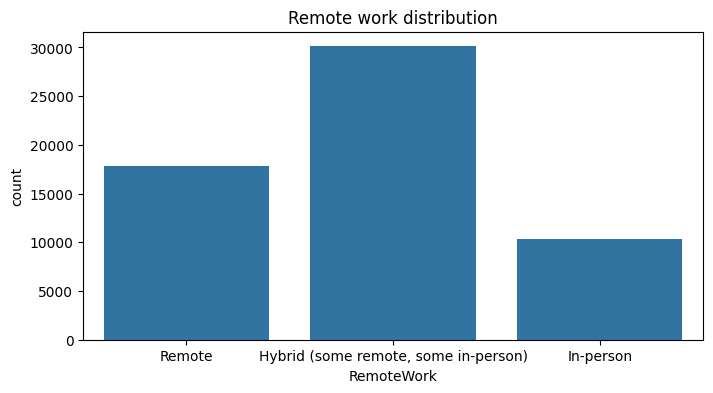

In [28]:
plt.figure(figsize = (8,4))
sns.countplot(data = df_2_clean, x = 'RemoteWork')
plt.title('Remote work distribution')

In [29]:
# filter data in Employment column, so that there is only entries with employed will be valid for further analysis
# Step 1: Split the entries into lists
df_2_clean.loc[:,'Employment'] = df_2_clean['Employment'].str.split(';')

# Step 2: Define a function to check for valid employment statuses
def is_employed(employment_list):
    valid_statuses = ['Employed, full-time', 'Employed, part-time', 'Independent contractor, freelancer, or self-employed']
    return any(status in employment_list for status in valid_statuses)

# Step 3: Filter the DataFrame
filtered_df = df_2_clean[df_2_clean['Employment'].apply(is_employed)]
filtered_df['Employment'].value_counts()

Employment
[Employed, full-time]                                                         39041
[Independent contractor, freelancer, or self-employed]                         4846
[Employed, part-time]                                                          1266
[Student, full-time, Employed, part-time]                                      1115
[Employed, full-time, Student, full-time]                                       897
[Employed, full-time, Student, part-time]                                       839
[Student, part-time, Employed, part-time]                                       558
[Student, full-time, Independent contractor, freelancer, or self-employed]      375
[Independent contractor, freelancer, or self-employed, Student, part-time]      131
Name: count, dtype: int64

In [30]:
exploded_df = filtered_df.explode('Employment')
pd.crosstab(exploded_df['Employment'], exploded_df['RemoteWork'])
# .explode('Employment') makes each value in the list a separate row (keeping other columns unchanged). 
# Now each row has only one job value, so pd.crosstab() will work normally.

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
Employment,,,
"Employed, full-time",18024,9110,13643
"Employed, part-time",1375,866,698
"Independent contractor, freelancer, or self-employed",1462,362,3528
"Student, full-time",1024,698,665
"Student, part-time",662,445,421


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [65]:
# Use df_2_clean for analysis, as it has removed conflicting data related to Employment. Conflict entries will definitely reduce the reliability of the data
df_2_clean.shape

(58316, 114)

In [66]:
df_3 = df_2_clean # create new dataframe for better use
df_3['LanguageHaveWorkedWith'].isnull().sum()

np.int64(5155)

In [67]:
df_3 = df_3.dropna(subset='LanguageHaveWorkedWith')
df_3.shape

(53161, 114)

In [68]:
# having too many entries in the LanguageHaveWorkedWith column can lead to unreliable analysis.
# therefore, limit it to 5
# Step 1: Define a threshold for the maximum number of languages
max_languages = 5

# Step 2: Count the number of languages in each entry
df_3 = df_3.copy()
df_3['LanguageCount'] = df_3['LanguageHaveWorkedWith'].str.split(';').str.len()

# Step 3: Filter the DataFrame to keep only entries with a count below the threshold
filtered_df_3 = df_3[df_3['LanguageCount'] <= max_languages]

# Separate the values by the ';' delimiter and create dummy variables
languages_dummies = filtered_df_3['LanguageHaveWorkedWith'].str.get_dummies(sep=';')
# Remove any extra spaces around the column name (if any)
languages_dummies.columns = [col.strip() for col in languages_dummies.columns]
languages_dummies

,Ada,Apex,Assembly,Bash/Shell (all shells),C,C#,C++,Clojure,Cobol,Crystal,Dart,Delphi,Elixir,Erlang,F#,Fortran,GDScript,Go,Groovy,HTML/CSS,Haskell,Java,JavaScript,Julia,Kotlin,Lisp,Lua,MATLAB,MicroPython,Nim,OCaml,Objective-C,PHP,Perl,PowerShell,Prolog,Python,R,Ruby,Rust,SQL,Scala,Solidity,Swift,TypeScript,VBA,Visual Basic (.Net),Zephyr,Zig
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
65409,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
65412,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
65414,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [69]:
!pip install pycountry-convert
import pycountry_convert as pc
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

In [70]:
filtered_df_3['Country'].value_counts()


Country
United States of America                                5530
Germany                                                 2539
India                                                   2401
United Kingdom of Great Britain and Northern Ireland    1753
Ukraine                                                 1717
                                                        ... 
Djibouti                                                   1
Monaco                                                     1
Democratic Republic of the Congo                           1
Solomon Islands                                            1
Libyan Arab Jamahiriya                                     1
Name: count, Length: 176, dtype: int64

In [71]:
# 'Republic of Korea' 'South Korea' 'North Korea'
filtered_df_3.loc[:,'Country'] = filtered_df_3['Country'].replace({"Iran, Islamic Republic of...": "Iran", 
                                                                   "Venezuela, Bolivarian Republic of...":"Venezuela",
                                                                   "Palestine":"Palestine, State of",
                                                                   "Republic of Korea" : "Korea, Republic of",
                                                                   "South Korea" : "Korea, Republic of",
                                                                   "North Korea" : "Korea, Democratic People's Republic of",
                                                                   "Hong Kong (S.A.R.)" : "Hong Kong",
                                                                   "Cape Verde" : "Cabo Verde",
                                                                   "Congo, Republic of the..." : "Congo",
                                                                   "Democratic Republic of the Congo" : "Congo, The Democratic Republic of the",
                                                                   "Swaziland" : "Eswatini",
                                                                   "Micronesia, Federated States of..." : "Micronesia, Federated States of",
                                                                   "Libyan Arab Jamahiriya" : "Libya"
                                                                  })
def coun_to_con(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return 'Unknown'
filtered_df_3 = filtered_df_3.copy()
filtered_df_3.loc[:,'Continent'] = filtered_df_3['Country'].apply(coun_to_con)
filtered_df_3['Continent'].value_counts()

Continent
Europe           15388
North America     6922
Asia              5630
Unknown           1268
South America     1232
Africa             907
Oceania            831
Name: count, dtype: int64

In [72]:
filtered_df_3['Continent'].isnull().sum()


np.int64(0)

In [73]:
# Step 1: Split the LanguageHaveWorkedWith entries into lists
filtered_df_3['LanguageHaveWorkedWith'] = filtered_df_3['LanguageHaveWorkedWith'].str.split(';')

# Step 2: Explode the DataFrame to have one language per row
exploded_df_3 = filtered_df_3.explode('LanguageHaveWorkedWith')

# Step 3: Count the occurrences of each language by region
language_counts = exploded_df_3.groupby(['Continent', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

# Step 4: Pivot the data for better visualization
pivot_df_3 = language_counts.pivot(index='Continent', columns='LanguageHaveWorkedWith', values='Count').fillna(0)

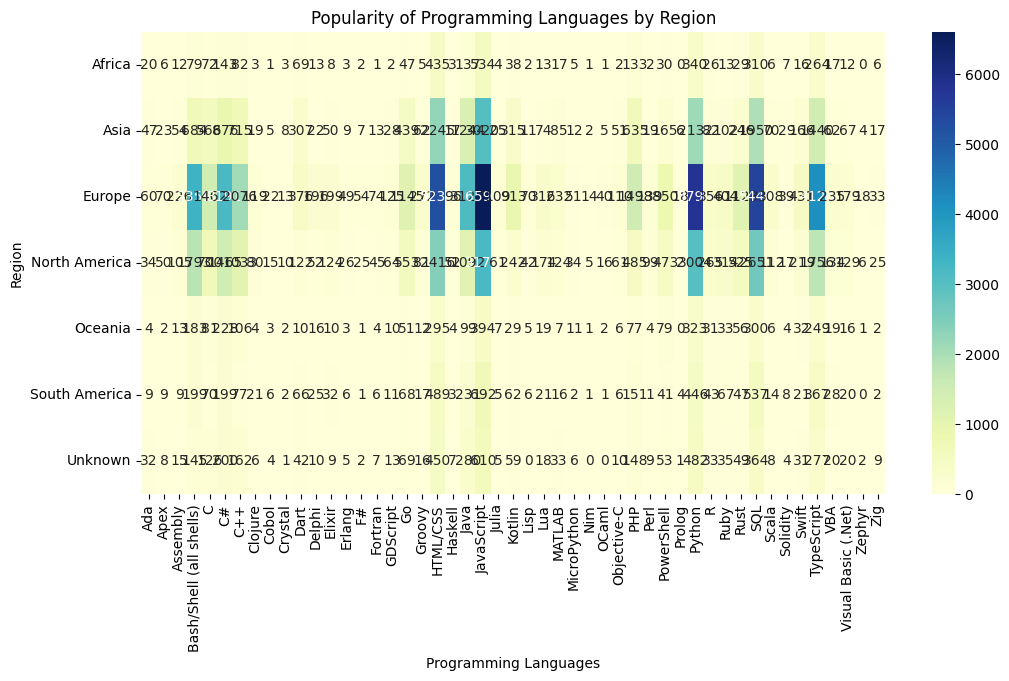

In [74]:
# Step 5: Visualize the results
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df_3, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Popularity of Programming Languages by Region')
plt.xlabel('Programming Languages')
plt.ylabel('Region')
plt.show()

In [75]:
# Step 4: Identify the top programming languages by region
top_languages = language_counts.sort_values(['Continent', 'Count'], ascending=[True, False])

# Step 5: Display the top programming languages for each region
top_languages = top_languages.groupby('Continent').head(3)  # Get top 3 languages per region

# Display the result
print(top_languages)

         Continent LanguageHaveWorkedWith  Count
22          Africa             JavaScript    534
19          Africa               HTML/CSS    435
35          Africa                 Python    340
69            Asia             JavaScript   3020
66            Asia               HTML/CSS   2245
83            Asia                 Python   2132
118         Europe             JavaScript   6595
132         Europe                 Python   5796
136         Europe                    SQL   5448
167  North America             JavaScript   3171
181  North America                 Python   3004
185  North America                    SQL   2651
216        Oceania             JavaScript    394
229        Oceania                 Python    323
233        Oceania                    SQL    300
264  South America             JavaScript    692
282  South America                    SQL    537
261  South America               HTML/CSS    489
312        Unknown             JavaScript    610
323        Unknown  

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [76]:
## Write your code here
df['JobSatPoints_1'].isnull().sum()

np.int64(36113)

In [77]:
# too many missing value for this JobSatPoints_1 columns, better drop all missing value for further analysis
df_4 = df.dropna(subset='JobSatPoints_1')
df_4['JobSatPoints_1'].value_counts

<bound method IndexOpsMixin.value_counts of 1         0.0
10       50.0
12        0.0
15        0.0
18       10.0
         ... 
65178     0.0
65218     0.0
65265    20.0
65351     0.0
65435     0.0
Name: JobSatPoints_1, Length: 29324, dtype: float64>

In [78]:
df_4['YearsCodePro'].isnull().sum()

np.int64(828)

In [79]:
df_4.loc[:,'YearsCodePro'] = df_4['YearsCodePro'].fillna(df_4['YearsCodePro'].mode()[0])
df_4['YearsCodePro'].isnull().sum()

np.int64(0)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60')])

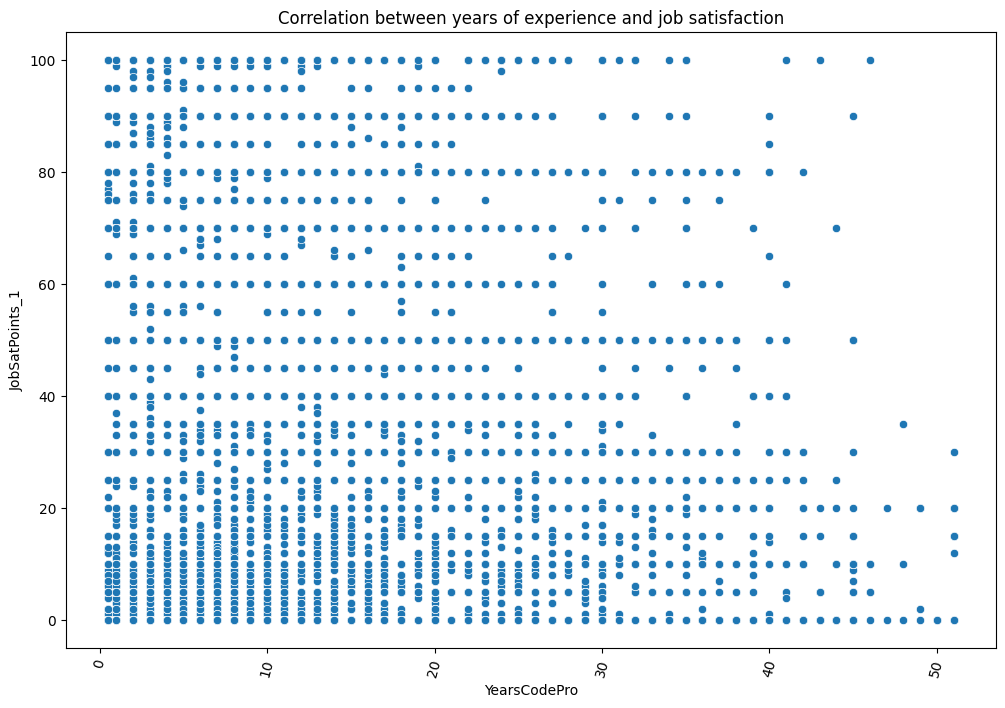

In [81]:
df_4 = df_4.copy()
df_4['YearsCodePro']=df_4['YearsCodePro'].replace({'Less than 1 year': '0.5', 
                              'More than 50 years': '51'})
df_4['YearsCodePro'] = df_4['YearsCodePro'].astype(float)
plt.figure(figsize = (12,8))
sns.scatterplot(df_4, y='JobSatPoints_1', x = 'YearsCodePro')
plt.title('Correlation between years of experience and job satisfaction')
plt.xticks(rotation = 75)

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [82]:
## Write your code here
# use above dataframe exploded_df which have been cleaned for Employment, drop any conflict entries
exploded_df['EdLevel'].isnull().sum()

np.int64(3573)

In [83]:
# since Edlevel is multiple choice and it make no sense for missing data, better drop all missing data
exploded_df= exploded_df.dropna(subset='EdLevel')
exploded_df['EdLevel'].isnull().sum()


np.int64(0)

In [86]:
education_map = {"Bachelor’s degree (B.A., B.S., B.Eng., etc.)" : "Bachelor’s degree",
                 "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)" : "Master's degree",
                 "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)" : "Secondary school",
                 "Professional degree (JD, MD, Ph.D, Ed.D, etc.)" : "Professional degree",
                 "Associate degree (A.A., A.S., etc.)" : "Associate degree",
                "Some college/university study without earning a degree" : "College/university (no degree)"}
exploded_df = exploded_df.copy()
exploded_df['EdLevel'] = exploded_df['EdLevel'].replace(education_map)
exploded_df['EdLevel'].value_counts()

EdLevel
Bachelor’s degree                 21351
Master's degree                   13712
College/university (no degree)     5978
Secondary school                   3371
Professional degree                2545
Associate degree                   1511
Something else                      565
Primary/elementary school           377
Name: count, dtype: int64

In [87]:
# Step 1: Create a cross-tabulation
cross_tab = pd.crosstab(exploded_df['EdLevel'], exploded_df['Employment'])

# Display the cross-tabulation
print(cross_tab)

Employment                      Employed, full-time  Employed, part-time  \
EdLevel                                                                    
Associate degree                               1125                   93   
Bachelor’s degree                             17432                  925   
College/university (no degree)                 3895                  491   
Master's degree                               11338                  482   
Primary/elementary school                       166                   56   
Professional degree                            2124                   95   
Secondary school                               1624                  511   
Something else                                  394                   49   

Employment                      Independent contractor, freelancer, or self-employed  \
EdLevel                                                                                
Associate degree                                               

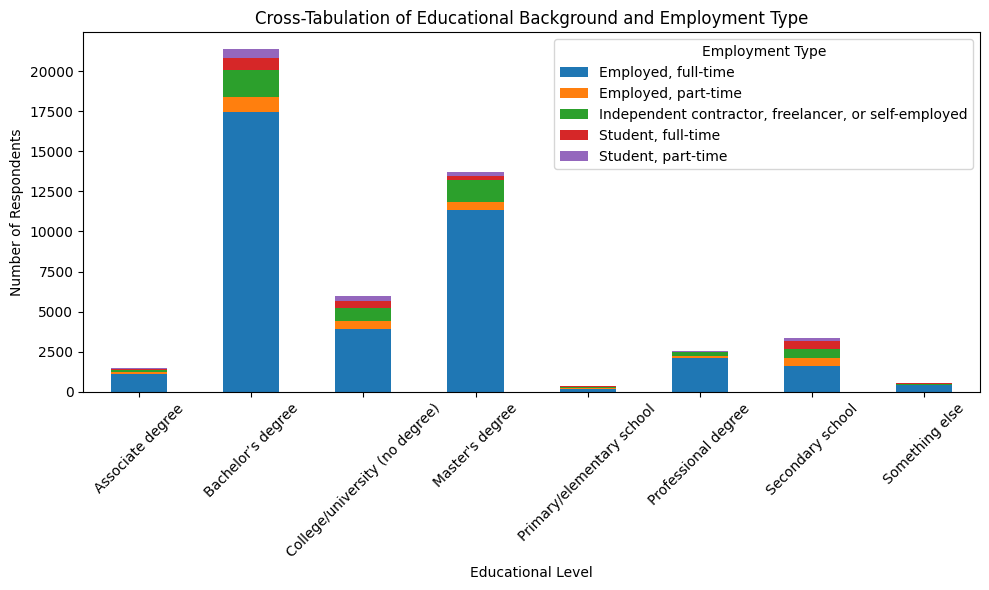

In [88]:
# Step 2: Visualize the cross-tabulation
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add titles and labels
plt.title('Cross-Tabulation of Educational Background and Employment Type')
plt.xlabel('Educational Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Employment Type')

# Show the plot
plt.tight_layout()
plt.show()

In [89]:
# we can map the data regarding to Employment again, which contain only 3 categories
filtered_df['Employment'].value_counts()

Employment
[Employed, full-time]                                                         39041
[Independent contractor, freelancer, or self-employed]                         4846
[Employed, part-time]                                                          1266
[Student, full-time, Employed, part-time]                                      1115
[Employed, full-time, Student, full-time]                                       897
[Employed, full-time, Student, part-time]                                       839
[Student, part-time, Employed, part-time]                                       558
[Student, full-time, Independent contractor, freelancer, or self-employed]      375
[Independent contractor, freelancer, or self-employed, Student, part-time]      131
Name: count, dtype: int64

In [90]:
filtered_df = filtered_df.copy()
# Step 1: Merge into a string
filtered_df['Employment_str'] = filtered_df['Employment'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
# Step 2: Perform the replacement
filtered_df['Employment_str'] = filtered_df['Employment_str'].replace({
    "Student, full-time, Employed, part-time": "Employed, part-time",
    "Employed, full-time, Student, full-time": "Employed, full-time",
    "Employed, full-time, Student, part-time": "Employed, full-time",
    "Student, part-time, Employed, part-time": "Employed, part-time",
    "Student, full-time, Independent contractor, freelancer, or self-employed": "Independent contractor, freelancer, or self-employed",
    "Independent contractor, freelancer, or self-employed, Student, part-time": "Independent contractor, freelancer, or self-employed"
})
filtered_df['Employment_str'].value_counts()

Employment_str
Employed, full-time                                     40777
Independent contractor, freelancer, or self-employed     5352
Employed, part-time                                      2939
Name: count, dtype: int64

In [91]:
education_map = {"Bachelor’s degree (B.A., B.S., B.Eng., etc.)" : "Bachelor’s degree",
                 "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)" : "Master's degree",
                 "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)" : "Secondary school",
                 "Professional degree (JD, MD, Ph.D, Ed.D, etc.)" : "Professional degree",
                 "Associate degree (A.A., A.S., etc.)" : "Associate degree",
                "Some college/university study without earning a degree" : "College/university (no degree)"}
filtered_df['EdLevel']=filtered_df['EdLevel'].replace(education_map)
cross_tab_02 = pd.crosstab(filtered_df['EdLevel'], filtered_df['Employment_str'])
print(cross_tab_02)

Employment_str                  Employed, full-time  Employed, part-time  \
EdLevel                                                                    
Associate degree                               1125                   93   
Bachelor’s degree                             17432                  925   
College/university (no degree)                 3895                  491   
Master's degree                               11338                  482   
Primary/elementary school                       166                   56   
Professional degree                            2124                   95   
Secondary school                               1624                  511   
Something else                                  394                   49   

Employment_str                  Independent contractor, freelancer, or self-employed  
EdLevel                                                                               
Associate degree                                                 

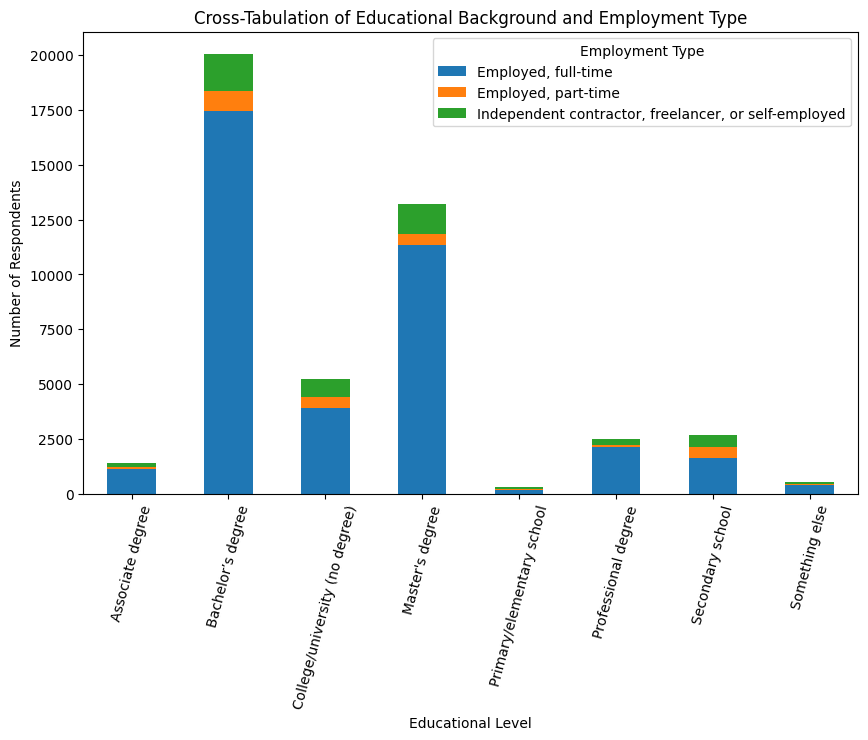

In [92]:
cross_tab_02.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add titles and labels
plt.title('Cross-Tabulation of Educational Background and Employment Type')
plt.xlabel('Educational Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=75)
plt.legend(title='Employment Type')

# Show the plot
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [93]:
## Write your code here
filtered_df.to_csv('Clean_Edu_Employ_data', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
